# Pre Processing Step

In [ ]:
# Importing Required Libraries
import pandas as pd


In [ ]:
# Load the Data
data = pd.read_csv('loan_data.csv')

In [ ]:
# Looking at the first five rows of the data
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Shape of the data
data.shape

(614, 13)

In [ ]:
# Checking missing values in the data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Check data types of the variable
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Filling the Missing values

Categorical Data- Mode

In [ ]:
# Filling missing values of Categorical variable with mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

Continous Data - Mean or Median

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Filling misssing values of Continous Data with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [ ]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Converting Categories to Number**

In [ ]:
# Converting the categories into number using mapFunction
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 0, 'Not Graduate': 1})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [ ]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,0,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,0,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,0,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,0,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,0,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [ ]:
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# Bringing all the Variable in range 0 to 1

In [ ]:
# Bringing Variable in range 0 to 1
data['Dependents'] = (data['Dependents']- data['Dependents'].min())/(data['Dependents'].max()- 
                                                                     data['Dependents'].min())

In [ ]:
# Applying for loop to bring all the variable in range 0 to 1
for i in data.columns[1:]:
  data[i]= (data[i]- data[i].min())/(data[i].max()- data[i].min())

In [ ]:
# Again looking at first five rows of pre-processed data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# Saving the pre-processd data
data.to_csv('Loan_prediction_data.csv', index = False)

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load data set of Loan_prediction_data
data = pd.read_csv('Loan_prediction_data.csv')

In [ ]:
# Looking the first five rows of dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [ ]:
# Checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Checking the datatypes
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [ ]:
# Removing the loanID Since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [ ]:
# Looking at the shape of the data
data.shape

(614, 12)

In [ ]:
# Seprating the independent and dependent variables

# Storing all the independent variable as X
X = data.drop('Loan_Status', axis=1)

# Storing the dependent variable as y
y = data['Loan_Status']

In [ ]:
# Shape of independent and dependent variable
X.shape, y.shape

((614, 11), (614,))

# Creating Training and Validation Set

In [ ]:
# Creating training and validation set

# Stratify will make sure that the distribution of classes in train and validation set it similar
# random state to generate the same train and validation set
# test size 0.2 will keep 20% data in validating and 80% in train set

X_train, X_test, y_train, y_test= train_test_split(X,y,stratify=data['Loan_Status'], random_state=10,
                                                   test_size=0.2)

In [ ]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

# Define the Architecture of the model

Create a model

Defining Different layers

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
# Importing differnt layers from keras
from keras.layers import InputLayer, Dense

In [ ]:
# Number of input Neurons
X_train.shape

(491, 11)

In [ ]:
# Number of feature in the neurons
X_train.shape[1]

11

In [ ]:
# Defininng the input neurons
input_neurons= X_train.shape[1]

In [ ]:
# Defining the output neurons
output_neurons = 1

In [ ]:
# It is a hyparparameter and we can pick the hidden layers and hidden neurons on our own
# Define hidden layer and neurons in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
# Activations Function of different layer

# for now I have pickedc relu as an activation function for hidden layer, we can change it as well
# Since it is a binary classification problem. I have used sigmoid activation function in the final layer

# Defining the Architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))


In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Number of parameter between input and first hidden layer
input_neurons*neuron_hidden_layer_1

110

In [ ]:
# Number of parameter between input and first hidden layer
# Adding the bias for each neuron of first hidden layer
input_neurons*neuron_hidden_layer_1+10

120

In [ ]:
# Number of parameter between first and second hidden layer
neuron_hidden_layer_1*neuron_hidden_layer_2+5

55

In [ ]:
# Number of parameter between second hidden and output layer
neuron_hidden_layer_2*output_neurons + 1

6

# **Compiling the model(Defining loss function, optimizers)**

In [ ]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizers as adam
# Evaluation metric as accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Training the Model**

In [ ]:
# Training the model
# passing the independent and dependent features for training set for training the model
# validation data will be evaluated at the end of the each epoch 
# setting the epoch as 50
# Storing the training model in model_history which will be used to visualize the training process
model_history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 13ms/step - loss: 0.7832 - accuracy: 0.3279 - val_loss: 0.7517 - val_accuracy: 0.3089
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7321 - accuracy: 0.3340 - val_loss: 0.7140 - val_accuracy: 0.3252
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.4318 - val_loss: 0.6989 - val_accuracy: 0.5610
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.6130 - val_loss: 0.6904 - val_accuracy: 0.6585
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6517 - val_loss: 0.6830 - val_accuracy: 0.6504
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6599 - val_loss: 0.6775 - val_accuracy: 0.6667
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6741 - val_loss: 0.6729 - val_accuracy: 0.6748
Epoch 8/50
16/16 [=

# **Evaluating model performance on validation set**

In [ ]:
# getting prediction for the validation set
prediction = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.7317073170731707

# **Visualising the model performance**

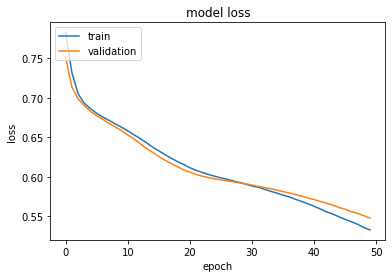

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

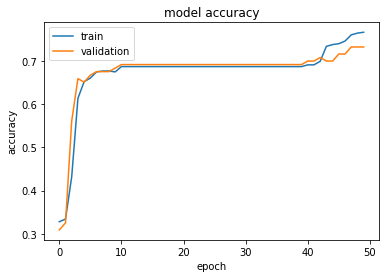

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()